<a href="https://colab.research.google.com/github/provbs/predict_stock_lstm/blob/main/%EC%A3%BC%EC%8B%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd


# ▶ 1. 데이터 준비

In [ ]:
def ReadCSVandSavetoDF(filename): 
    
    df = pd.read_csv(filename)
    df = pd.DataFrame(df)
    return df

In [ ]:
cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [ ]:
data_list = ReadCSVandSavetoDF("sk하이닉스원본.csv")
data_list[:20]

,날짜,볼벤중심선,볼벤상한선,볼벤하한선,거래량,거래량5,거래량20,거래량60,거래량120,RSI14,MACD오실,MACD,시그널,종가
0,2001-09-03,27311.31667,39371.07089,15251.56244,10702472,15450008.8,8736252.85,5775828.350,4539890.417,24.632529,-850.499421,-5229.587489,-4379.088069,15704
1,2001-09-04,26486.86667,38892.39501,14081.33832,12306601,15430405.0,8884416.65,5910774.567,4615425.567,31.422643,-633.280441,-5170.688620,-4537.408179,18059
2,2001-09-05,25770.36667,38180.81104,13359.92229,24637531,18148276.0,9730976.10,6277300.067,4794920.300,34.596819,-347.390293,-4971.646045,-4624.255752,19237
3,2001-09-06,25240.36667,37422.95277,13057.78056,14295267,16686239.4,10197289.85,6469046.267,4899489.692,41.626568,73.794414,-4532.012734,-4605.807149,22083
4,2001-09-07,24962.26667,36934.66716,12989.86617,8974814,14183337.0,10437968.90,6540682.517,4959822.600,48.421296,582.612082,-3877.542046,-4460.154128,25322
5,2001-09-10,24816.66667,36582.41269,13050.92064,17730732,15588989.0,11126195.85,6776979.183,5095969.350,52.398720,1049.432360,-3148.363678,-4197.796038,27481
6,2001-09-11,24586.01667,36146.07581,13025.95752,18044482,16736565.2,11828600.70,7020752.350,5233550.475,45.227771,1062.227383,-2870.011809,-3932.239192,23359
7,2001-09-12,23962.78333,35109.61691,12815.94976,149519,11838962.8,11434186.20,6934014.200,5224485.917,40.280616,831.199140,-2893.240267,-3724.439407,19924
8,2001-09-13,23401.70000,33864.75618,12938.64382,29853380,14950585.4,12557015.60,7376584.133,5448558.025,45.756953,864.656486,-2643.618799,-3508.275286,22868
9,2001-09-14,22840.61667,32434.05426,13247.17907,32141717,19583966.0,13882617.95,7836825.350,5697502.108,41.150629,659.324913,-2684.119145,-3343.444057,19531


In [ ]:
# X와 Y로 자르기
normalized_data = data_list.copy()

X = normalized_data.loc[:, '볼벤중심선':'시그널']
#X = normalized_data[['RSI','MACD']]
Y = normalized_data[['종가']]

## ▶ 데이터 노말라이제이션

In [ ]:
display(X)
#x컬럼 디노말라이제이션을 위해서 저장
x_column_min_list= []
x_column_max_list= []

#X컬럼 노말라이제이션 진행
for column in X.columns:
    x_column_min_list.append(X[column].min())
    x_column_max_list.append(X[column].max())
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())


import copy


x_column_min_list_copy = copy.deepcopy(x_column_min_list)
x_column_max_list_copy = copy.deepcopy(x_column_max_list)


#Y 컬럼 노말라이제이션
#Y = Y.to_frame()

display(Y)
##### classification할때만 주석처리
Y_column_min_save = Y['종가'].min()
Y_column_max_save = Y['종가'].max()

for column in Y.columns:
    Y[column] = (Y[column] - Y[column].min()) / (Y[column].max() - Y[column].min())
######
  
# view normalized data
feature_num = len(X.columns)
#print(X.isnull().sum())
#print(Y.isnull().sum())
#display(X[:10], Y[:10])
#print(type(X), type(Y))
#print(len(X), len(Y))
#display(X.iloc[:10],Y.iloc[:10])
#display(X.tail(),Y.tail())
#display(Y.iloc[3952])
display(X)
display(Y)

,볼벤중심선,볼벤상한선,볼벤하한선,거래량,거래량5,거래량20,거래량60,거래량120,RSI14,MACD오실,MACD,시그널
0,27311.31667,39371.07089,15251.56244,10702472,15450008.8,8736252.85,5775828.350,4539890.417,24.632529,-850.499421,-5229.587489,-4379.088069
1,26486.86667,38892.39501,14081.33832,12306601,15430405.0,8884416.65,5910774.567,4615425.567,31.422643,-633.280441,-5170.688620,-4537.408179
2,25770.36667,38180.81104,13359.92229,24637531,18148276.0,9730976.10,6277300.067,4794920.300,34.596819,-347.390293,-4971.646045,-4624.255752
3,25240.36667,37422.95277,13057.78056,14295267,16686239.4,10197289.85,6469046.267,4899489.692,41.626568,73.794414,-4532.012734,-4605.807149
4,24962.26667,36934.66716,12989.86617,8974814,14183337.0,10437968.90,6540682.517,4959822.600,48.421296,582.612082,-3877.542046,-4460.154128
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,95560.00000,103902.43770,87217.56231,2185108,2829157.0,3167019.45,3325893.850,3603576.850,55.334677,1217.345255,677.223230,-540.122025
5164,95831.66667,104403.77840,87259.55491,1636970,2614734.2,3147719.65,3306427.250,3561556.567,56.405201,1064.728359,790.788424,-273.939936
5165,96136.66667,104849.82150,87423.51186,3159499,2450423.4,3179195.95,3296545.317,3548081.475,54.985940,883.844852,830.866129,-52.978723
5166,96548.33333,105161.53960,87935.12706,3359717,2693570.0,3192239.10,3316284.200,3532985.967,53.254275,686.330364,804.934233,118.603868


,종가
0,15704
1,18059
2,19237
3,22083
4,25322
...,...
5163,100000
5164,100500
5165,100000
5166,99400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,볼벤중심선,볼벤상한선,볼벤하한선,거래량,거래량5,거래량20,거래량60,거래량120,RSI14,MACD오실,MACD,시그널
0,0.179219,0.249138,0.104220,0.114626,0.209135,0.126010,0.117814,0.075914,0.127816,0.341503,0.094962,0.057630
1,0.173194,0.245843,0.095347,0.131806,0.208870,0.128631,0.121974,0.078533,0.223845,0.395494,0.099094,0.044453
2,0.167959,0.240944,0.089876,0.263873,0.245660,0.143611,0.133273,0.084756,0.268735,0.466554,0.113059,0.037225
3,0.164086,0.235727,0.087585,0.153105,0.225869,0.151863,0.139183,0.088381,0.368153,0.571243,0.143905,0.038760
4,0.162054,0.232366,0.087070,0.096122,0.191989,0.156121,0.141392,0.090472,0.464247,0.697714,0.189824,0.050883
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0.677902,0.693360,0.649931,0.023403,0.038296,0.027463,0.042290,0.043453,0.562019,0.855482,0.509394,0.377148
5164,0.679887,0.696811,0.650250,0.017532,0.035394,0.027121,0.041690,0.041997,0.577159,0.817548,0.517362,0.399302
5165,0.682115,0.699882,0.651493,0.033839,0.033170,0.027678,0.041386,0.041529,0.557087,0.772588,0.520174,0.417693
5166,0.685123,0.702027,0.655373,0.035983,0.036461,0.027909,0.041994,0.041006,0.532597,0.723494,0.518355,0.431974


,종가
0,0.089503
1,0.105650
2,0.113726
3,0.133240
4,0.155447
...,...
5163,0.667467
5164,0.670895
5165,0.667467
5166,0.663353


In [ ]:
##나중에 prediction 새로운거 할때 써먹을것임.
def denomarlization_on_y(value):
  A = Y_column_max_save - Y_column_min_save
  B = value * A + Y_column_min_save
  answer =  B
  return answer

def normalize_x_with_training_value(df):
  print("entered normalization with x history")
  i = 0
  for column in df.columns:
    df[column] = (df[column] - x_column_min_list_copy[i]) / (x_column_max_list_copy[i] - x_column_min_list_copy[i])
    i += 1
    print("loop number : ", i)
  return df

def normalize_y_with_training_value(df):
  print("entered normalization with y history")

  for column in df.columns:
    df[column] = (df[column] - Y_column_min_save) / (Y_column_max_save - Y_column_min_save)
    print("Y normalized complete")
  return df

# ▶ 2. 데이터를 필요 모델에 맞춰서 가공

## ▶ X 와 Y 데이터 모아주기 (many to one) SLIDING

In [ ]:
#sliding input

sliding_window = 5

X_copy = X.copy()
Y_copy = Y.copy()

print("X copy was originally length of ", len(X_copy))
print("Y copy was originally length of ", len(Y_copy))

display(X_copy)
display(Y_copy.iloc[7])
print("Y copy's first row was cut, now length is ", len(Y_copy))

#sliding output
def sliding_data_by_num(X_copy, Y_copy, sliding_window_num, predBool):

  prednum = 0
  if predBool == True: prednum = 1
  X_vec = []
  Y_vec = []

  Y_copy = Y_copy[sliding_window:]
  Y_copy = Y_copy.reset_index(drop = True)

  group_size = sliding_window
  num = 0
  temp2 = []
  
  for i in range(len(X_copy)-(sliding_window)+prednum):
    temp2 = []
    temp = X_copy.iloc[i:i+sliding_window]
    
    for j in range(0, feature_num):
      temp2.append(temp.iloc[:,j].values.tolist())

    X_vec.append(temp2)
    if i < len(Y_copy):
      Y_vec.append(Y_copy.iloc[i])

  return X_vec, Y_vec

X_vec, Y_vec = sliding_data_by_num(X_copy, Y_copy, sliding_window, False)

print("X copy is slided by ", sliding_window, "and converted to X_vec which length is now ", len(X_vec))
print("Y copy is slided by ", sliding_window, "and converted to Y_vec which length is now ", len(Y_vec))
print(np.shape(X_vec))
print(X_vec[2])
print(Y_vec[2])

X copy was originally length of  5168
Y copy was originally length of  5168


,볼벤중심선,볼벤상한선,볼벤하한선,거래량,거래량5,거래량20,거래량60,거래량120,RSI14,MACD오실,MACD,시그널
0,0.179219,0.249138,0.104220,0.114626,0.209135,0.126010,0.117814,0.075914,0.127816,0.341503,0.094962,0.057630
1,0.173194,0.245843,0.095347,0.131806,0.208870,0.128631,0.121974,0.078533,0.223845,0.395494,0.099094,0.044453
2,0.167959,0.240944,0.089876,0.263873,0.245660,0.143611,0.133273,0.084756,0.268735,0.466554,0.113059,0.037225
3,0.164086,0.235727,0.087585,0.153105,0.225869,0.151863,0.139183,0.088381,0.368153,0.571243,0.143905,0.038760
4,0.162054,0.232366,0.087070,0.096122,0.191989,0.156121,0.141392,0.090472,0.464247,0.697714,0.189824,0.050883
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0.677902,0.693360,0.649931,0.023403,0.038296,0.027463,0.042290,0.043453,0.562019,0.855482,0.509394,0.377148
5164,0.679887,0.696811,0.650250,0.017532,0.035394,0.027121,0.041690,0.041997,0.577159,0.817548,0.517362,0.399302
5165,0.682115,0.699882,0.651493,0.033839,0.033170,0.027678,0.041386,0.041529,0.557087,0.772588,0.520174,0.417693
5166,0.685123,0.702027,0.655373,0.035983,0.036461,0.027909,0.041994,0.041006,0.532597,0.723494,0.518355,0.431974


종가    0.118437
Name: 7, dtype: float64

Y copy's first row was cut, now length is  5168
X copy is slided by  5 and converted to X_vec which length is now  5163
Y copy is slided by  5 and converted to Y_vec which length is now  5163
(5163, 12, 5)
[[0.1679591069349567, 0.16408647464562395, 0.1620544387217307, 0.1609905608701706, 0.15930523513897327], [0.2409441872774929, 0.2357272271030419, 0.23236595668881582, 0.22994110020310068, 0.22693743551312615], [0.08987616019295028, 0.08758504935391097, 0.08707006125526025, 0.0875330312593997, 0.08734373839075742], [0.2638729778398922, 0.15310522277197103, 0.09612208689820236, 0.18989975302805576, 0.19326007946649904], [0.2456599273107824, 0.22586940809663206, 0.19198945048247726, 0.21101673264108317, 0.22655063161173933], [0.143611276991435, 0.15186266316507843, 0.15612146056373039, 0.16829958385423763, 0.1807285840018637], [0.13327250770151952, 0.13918340635281273, 0.141391714071603, 0.14867595565951708, 0.156190672947483], [0.08475556322366609, 0.08838083482972645, 0.09047249065845

In [ ]:
#sliding input - 클래시피케이션용

sliding_window = 10

X_copy = X.copy()
Y_copy = Y.copy()

Y_copy = pd.get_dummies(Y_copy)

print("X copy was originally length of ", len(X_copy))
print("Y copy was originally length of ", len(Y_copy))

display(X_copy)
display(Y_copy.iloc[0])
print("Y copy's first row was cut, now length is ", len(Y_copy))

#sliding output
def sliding_data_by_num(X_copy, Y_copy, sliding_window_num, predBool):

  prednum = 0
  if predBool == True: prednum = 1
  X_vec = []
  X_vec = np.array(X_vec)
  Y_vec = []

  Y_copy = Y_copy[sliding_window:]
  Y_copy = Y_copy.reset_index(drop = True)

  group_size = sliding_window
  num = 0
  temp2 = []
  tempfory = []
  
  for i in range(len(X_copy)-(sliding_window)+prednum):
    temp2 = []
    temp = X_copy.iloc[i:i+sliding_window]
    
    for j in range(0, feature_num):
      temp2.append(temp.iloc[:,j].values.tolist())

    X_vec = np.append(X_vec, temp2)

    #X_vec.append(temp2)
    if i < len(Y_copy):
      Y_vec.append(Y_copy.iloc[i])

  return X_vec, Y_vec

X_vec, Y_vec = sliding_data_by_num(X_copy, Y_copy, sliding_window, False)

print("X copy is slided by ", sliding_window, "and converted to X_vec which length is now ", len(X_vec))
print("Y copy is slided by ", sliding_window, "and converted to Y_vec which length is now ", len(Y_vec))
print(np.shape(X_vec))
print(X_vec[2])
print(Y_vec[2])

X copy was originally length of  5168
Y copy was originally length of  5168


,볼벤중심선,볼벤상한선,볼벤하한선,거래량,거래량5,거래량20,거래량60,거래량120,RSI14,MACD오실,MACD,시그널
0,0.179219,0.249138,0.104220,0.114626,0.209135,0.126010,0.117814,0.075914,0.127816,0.341503,0.094962,0.057630
1,0.173194,0.245843,0.095347,0.131806,0.208870,0.128631,0.121974,0.078533,0.223845,0.395494,0.099094,0.044453
2,0.167959,0.240944,0.089876,0.263873,0.245660,0.143611,0.133273,0.084756,0.268735,0.466554,0.113059,0.037225
3,0.164086,0.235727,0.087585,0.153105,0.225869,0.151863,0.139183,0.088381,0.368153,0.571243,0.143905,0.038760
4,0.162054,0.232366,0.087070,0.096122,0.191989,0.156121,0.141392,0.090472,0.464247,0.697714,0.189824,0.050883
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0.677902,0.693360,0.649931,0.023403,0.038296,0.027463,0.042290,0.043453,0.562019,0.855482,0.509394,0.377148
5164,0.679887,0.696811,0.650250,0.017532,0.035394,0.027121,0.041690,0.041997,0.577159,0.817548,0.517362,0.399302
5165,0.682115,0.699882,0.651493,0.033839,0.033170,0.027678,0.041386,0.041529,0.557087,0.772588,0.520174,0.417693
5166,0.685123,0.702027,0.655373,0.035983,0.036461,0.027909,0.041994,0.041006,0.532597,0.723494,0.518355,0.431974


종가    15704
Name: 0, dtype: int64

Y copy's first row was cut, now length is  5168
X copy is slided by  10 and converted to X_vec which length is now  618960
Y copy is slided by  10 and converted to Y_vec which length is now  5158
(618960,)
0.1679591069349567
종가    18550
Name: 2, dtype: int64


In [ ]:
print(X_vec[2])
print(Y_vec[23])

0.1679591069349567
종가    18452
Name: 23, dtype: int64


## ▶ X 와 Y 데이터 모아주기 (many to one) BLOCK CUTTING




In [ ]:
X_copy = X.copy()
Y_copy = Y.copy()

X_vec = []
Y_vec = []

group_size = 10
number = 0

In [ ]:
#내일 prediction을 위해 미리 맨끝에 10개를 따로 저장해둔다.
temp_x_pred = X_copy.copy()
temp_x_pred = temp_x_pred[-10:]
X_vec_pred = []

for i in range(0,1):
  temp_x_2_pred = []
  for k in range(0,feature_num):
    temp_x_2_pred.append(temp_x_pred.iloc[:,k].values.tolist())

  X_vec_pred.append(temp_x_2_pred)
  display(temp_x_pred)

print(np.shape(X_vec_pred))

,Bollinger중심선,Bollinger상한선,Bollinger하한선,거래량,이평선5,이평선20,이평선60,이평선120,RSI,MACD오실,MACD,MACD시그널
4258,0.687224,0.682659,0.681262,0.016110,0.054154,0.037666,0.052341,0.044808,0.342404,0.377110,0.390184,0.390406
4259,0.685239,0.679652,0.680450,0.051681,0.059171,0.037234,0.052737,0.044889,0.486241,0.442776,0.401498,0.382420
4260,0.684159,0.678270,0.679729,0.013915,0.052605,0.035863,0.052310,0.044367,0.501068,0.496698,0.413289,0.378828
4261,0.681634,0.673059,0.680209,0.015800,0.040937,0.032826,0.051454,0.044050,0.448236,0.511205,0.415245,0.376419
4262,0.679599,0.667955,0.681582,0.015819,0.025253,0.032459,0.049701,0.042629,0.476510,0.534531,0.421226,0.375910
4263,0.677376,0.664204,0.681090,0.021897,0.027067,0.031249,0.048449,0.042255,0.430896,0.531218,0.419660,0.375132
4264,0.675140,0.661172,0.679787,0.016453,0.016026,0.030883,0.044009,0.041779,0.374942,0.504886,0.409958,0.372208
4265,0.672602,0.657735,0.678304,0.009122,0.014524,0.030607,0.042500,0.041243,0.361483,0.485142,0.400711,0.367674
4266,0.670115,0.653781,0.677488,0.020326,0.015942,0.029198,0.042591,0.040912,0.404693,0.491868,0.399199,0.363689
4267,0.668457,0.648904,0.679391,0.022023,0.017886,0.027662,0.041430,0.040562,0.450847,0.516573,0.404327,0.361717


(1, 12, 10)


In [ ]:
# row기준 한줄씩 sequence로 넣기
# for i in range(len(X)):
#   temp_x = []
  
#   if (number+group_size) < len(X):
#     for j in range(0, group_size):
#       temp_x.append(X.iloc[number].values.tolist())
#       number += 1
  
#     X_vec.append(temp_x)
#     Y_vec.append(Y.iloc[number+1].values.tolist())

In [ ]:
# column기준 한줄씩 sequence로 넣기
# X를 group_size 줄씩 자르기
len_loop = int(len(Y_copy)/(group_size+1))


for i in range(len_loop):
  temp_x = X_copy[:group_size]
  temp_y = Y_copy[:group_size+1]
  X_copy = X_copy[group_size+1:]
  Y_copy = Y_copy[group_size+1:]
  temp_x_2 = []
  
  for k in range(0,feature_num):
    temp_x_2.append(temp_x.iloc[:,k].values.tolist())

  X_vec.append(temp_x_2)
  #print(type(X_vec), type(Y_vec))
  Y_vec.append(temp_y.iloc[group_size].item())
  #print(X_vec, Y_vec)

print(np.shape(X_vec), np.shape(Y_vec))

(388, 12, 10) (388,)


## ▶ X 와 Y 데이터 모아주기 (RNN - ONE TO ONE) BLOCK CUTTING

In [ ]:
X_copy = X.copy()
Y_copy = Y.copy()
X_copy = X_copy['RSI']

X_vec = []
Y_vec = []

group_size = 3
number = 0

데이터 나눠서 집어넣기

In [ ]:


# one to one 나눠넣기

len_loop = int(len(Y_copy)/(group_size+1))

for i in range(len_loop):
  temp_x = X_copy[:group_size]
  temp_y = Y_copy[:group_size+1]
  X_copy = X_copy[group_size+1:]
  Y_copy = Y_copy[group_size+1:]
  temp_x_2 = []

  temp_x_2.append(temp_x.values.tolist())

  X_vec.append(temp_x_2)
  #print(type(X_vec), type(Y_vec))
  Y_vec.append(temp_y.iloc[group_size].item())
  #print(X_vec, Y_vec)

print(np.shape(X_vec), np.shape(Y_vec))

(1067, 1, 3) (1067,)


In [ ]:
print(X_vec[5])
print(Y_vec[3])

[[0.5926887153722786, 0.5628714340352045, 0.6160877838914272]]
0.08096740273396424


## ▶ X 와 Y 데이터 모아주기 (linear regression) BLOCK CUTTING

In [ ]:
X_copy = X.copy()
Y_copy = Y.copy()

Y_copy = Y_copy.iloc[1: , :]
X_copy = X_copy[:-1]

print(len(X_copy), len(Y_copy))

4267 4267


In [ ]:
X_vec = X_copy.copy()
Y_vec = Y_copy.copy()

## ▶ 데이터를 Train 과 Test로 분할하기

# sklearn을 이용해서 셔플해서 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X_total = X_vec.copy()
Y_total = Y_vec.copy()

X_train, X_test, Y_train, Y_test = train_test_split(X_total,Y_total, test_size=0.05, shuffle=True, random_state=13)

display(np.shape(X_train), np.shape(Y_train))
display(np.shape(X_test), np.shape(Y_test))


(4904, 12, 5)

(4904, 1)

(259, 12, 5)

(259, 1)

# 그냥 나누기

In [ ]:
#X = pd.DataFrame(X.tolist())
X_total = X_vec.copy()
Y_total = Y_vec.copy()

train_number = int(len(X_total)*0.9)

X_train = X_total[:train_number]
Y_train = Y_total[:train_number]
X_test = X_total[train_number:]
Y_test = Y_total[train_number:]

#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

display(np.shape(X_train), np.shape(Y_train))
display(np.shape(X_test), np.shape(Y_test))


(4646, 12, 5)

(4646, 1)

(517, 12, 5)

(517, 1)

# ▶ 3. 모델

## RNN 모델

In [ ]:
## 머신러닝 모델 빌딩
from keras.layers import Dense, SimpleRNN, Embedding, BatchNormalization

group_size = sliding_window
def build_model():
    model = keras.Sequential([
    layers.LSTM(16, input_shape=(feature_num, group_size), return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(16, return_sequences=False),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mae', optimizer=optimizer, metrics=['mean_absolute_error'])

    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 16)            1408      
                                                                 
 lstm_5 (LSTM)               (None, 12, 16)            2112      
                                                                 
 lstm_6 (LSTM)               (None, 12, 16)            2112      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,761
Trainable params: 7,761
Non-trainable params: 0
_________________________________________________________________


## RNN 모델 2 TRUE/FALSE 퍼센티지

In [ ]:
## 머신러닝 모델 빌딩
from keras.layers import Dense, SimpleRNN, Embedding, BatchNormalization

group_size = sliding_window
def build_model():
    model = keras.Sequential([
    layers.LSTM(16, input_shape=(feature_num, group_size), return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(16, return_sequences=False),
    layers.Dense(2, activation = "softmax")
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer= optimizer,
              loss="categorical_crossentropy",
              metrics=['accuracy'])

    return model

model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 17, 16)            1728      
                                                                 
 lstm_33 (LSTM)              (None, 17, 16)            2112      
                                                                 
 lstm_34 (LSTM)              (None, 17, 16)            2112      
                                                                 
 lstm_35 (LSTM)              (None, 16)                2112      
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
Total params: 8,098
Trainable params: 8,098
Non-trainable params: 0
_________________________________________________________________


## Linear regression model

In [ ]:
## 머신러닝 모델 빌딩
from keras.layers import Dense, SimpleRNN, Embedding, BatchNormalization

def build_model():
    model = keras.Sequential([
    layers.Dense(32, activation = "relu", input_shape=[15]),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "relu")
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mae', optimizer=optimizer, metrics=['mean_squared_error'])

    return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                512       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


## 모델 실행

In [ ]:
# 머신러닝 돌리기


X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)



EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size = 64, verbose = 1,callbacks=[early_stop]) 
#history = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


Epoch 1/1000
77/77 [==============================] - 9s 22ms/step - loss: 0.1087 - mean_absolute_error: 0.1087
Epoch 2/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 3/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0284 - mean_absolute_error: 0.0284
Epoch 4/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0257 - mean_absolute_error: 0.0257
Epoch 5/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 6/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 7/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 8/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0152 - mean_absolute_error: 0.0152
Epoch 9/1000
77/77 [==============================] - 2s 22ms/step - loss: 0.0159 - mean_absolute_error:

# ▶ 4. 결과 분석

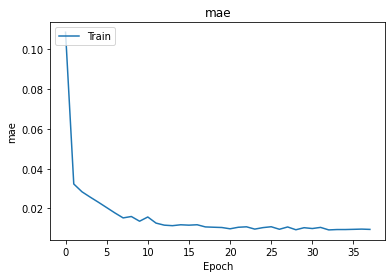

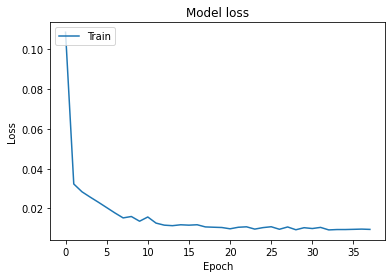

In [ ]:
# 플로팅으로 결과값 확인

import matplotlib.pyplot as plt

plt.plot(history.history['mean_absolute_error'])
plt.title('mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

9/9 [==============================] - 2s 6ms/step


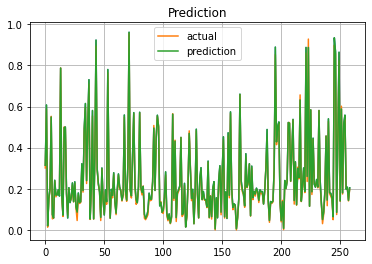

In [ ]:
pred = model.predict(X_test)
#print(np.shape(X_vec_pred))
#pred_tommorow = model.predict(X_vec_pred)
#print(pred_tommorow)

#Y_test_list = Y_test.values.tolist()
Y_test_list = Y_test

plt.plot(pred)
plt.title('Prediction')
plt.plot(Y_test_list, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid(True)

#plt.xticks(np.arange(0, 1000, 10))
#plt.yticks(np.arange(min(Y_test_list), max(Y_test_list)+1, 1))

plt.legend()
#plt.xlim([10,40])
#plt.ylim([0.1,0.2])
plt.show()

#print(pred[213], Y_test_list[213])


In [ ]:
## accuracy calculation binary classification용
pred_copy = pred.copy()
for i in range(len(pred_copy)) :
  if pred_copy[i] > 0.49 :
    pred_copy[i] = 1
  else:
    pred_copy[i] = 0

plt.title('Prediction')
plt.plot(Y_test_list, label = 'actual')
plt.plot(pred_copy, label = 'prediction')
plt.grid(True)

#plt.xticks(np.arange(0, 1000, 10))
#plt.yticks(np.arange(min(Y_test_list), max(Y_test_list)+1, 1))

plt.legend()
plt.xlim([20,60])
#plt.ylim([0.1,0.2])
plt.show()

#print(pred[213], Y_test_list[213])


In [ ]:
## accuracy calculation softmax classification용
pred = model.predict(X_test)
pred_copy = pred.copy()

display(pred_copy[:10])
display(Y_test[:10])


array([[0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644],
       [0.5312356, 0.4687644]], dtype=float32)

[[1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1]]

# 실제로 다음날을 예측해보자

In [ ]:
df_pred_tomorrow_data = ReadCSVandSavetoDF("sk하이닉스pred원본.csv")
#display(df_pred_tomorrow_data.columns)
df_pred_tomorrow_x_data = df_pred_tomorrow_data.loc[:,'볼벤중심선':'시그널']
#df_pred_tomorrow_x_data = df_pred_tomorrow_data[['RSI 14','MACD']]
df_pred_tomorrow_y_data = df_pred_tomorrow_data.loc[:, '종가']

input = normalize_x_with_training_value(df_pred_tomorrow_x_data)
#input = df_pred_tomorrow_x_data

df_pred_tomorrow_y_data = df_pred_tomorrow_y_data.to_frame()
output = normalize_y_with_training_value(df_pred_tomorrow_y_data)
#output = df_pred_tomorrow_y_data

print("==============================")

input_vec, output_vec = sliding_data_by_num(input, output, sliding_window, True)

print(np.shape(input_vec), np.shape(output_vec))
print(input_vec[0], output_vec[0])


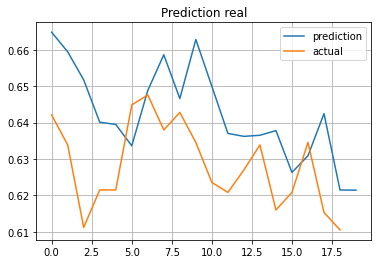

[99608.38335454]
[98825.59178472]
[97701.551947]
[96009.16778743]
[95919.57425177]
[95065.21043479]
[97278.06470692]
[98707.69274235]
[96956.09826148]
[99317.17393696]
[97444.87246573]
[95560.4524821]
[95442.77077317]
[95486.03751361]
[95673.18768203]
[94001.1285454]
[94668.2813406]
[96351.86784267]
[93297.75061309]
[93291.03066325]


In [ ]:
pred_tomorrow = model.predict(input_vec)

plt.title('Prediction real')
plt.plot(pred_tomorrow, label = 'prediction')
plt.plot(output_vec, label = 'actual')
plt.grid(True)
plt.legend()
#plt.xlim([3200,3230])
#plt.ylim([0.2,0.4])
plt.show()

for i in range(len(pred_tomorrow)):
  print(denomarlization_on_y(pred_tomorrow[i]))

# ▶ 5. 결과 저장

In [ ]:
# 모델 acuuracy 적고 저장
# model.save("my_model_1")

In [ ]:
# 모델 저장된거 가져오기
# reconstructed_model = keras.models.load_model("my_model_68.5")

In [ ]:
# 원하는 데이터를 넣어 내일 값을 예측해보자


# df_cols = ['PriceIncrement', 'StartPriceIncrement', 'IncrementCmp7days', 'VolumeIncrement', 'HighLowDiff']
# new_row =[-0.15,-0.31,-1.95,106.60,0.61]
# new_df = pd.DataFrame(columns = df_cols)
# new_df.loc[0] = new_row

# test_predictions = model.predict(new_df).flatten()
# display(test_predictions)